Detailed information about Experiment
Voltage =  6 V
Sigma =  10 eV
Sigmapercent =  0 %   pas encore utilisé
Fano =  0.2
IonModel =  CDMS  options are [CDMS,Rouven]
Target =  Ge options are [Ge,Si]
Epsilon =  3
Gap =  0.67
Exposure =  1  kg.days
Quenching =  EDW  options are [EDW,Lindhard_pure,Lindhard_corrected]
Target_uma =  72.64 uma
integral = 9.999958565183842


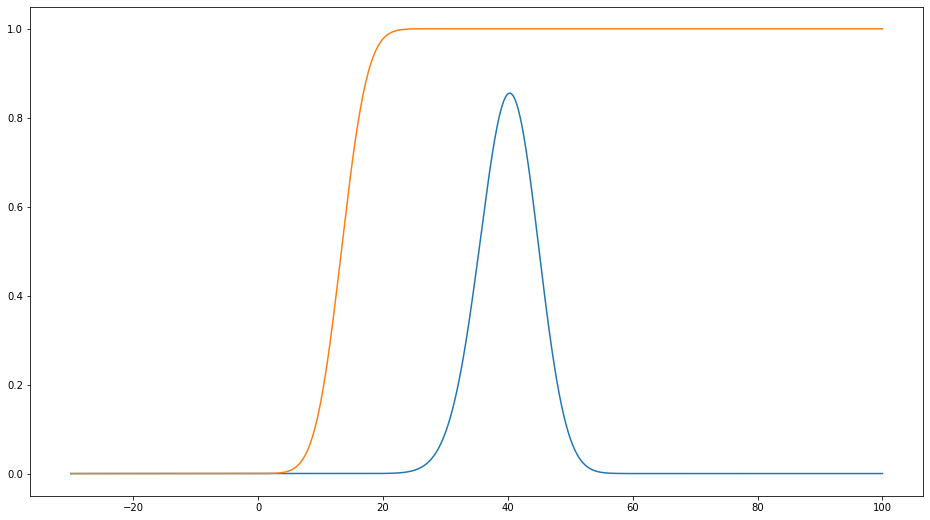

In [27]:
from Ultimate_Libraries import *
Exp = Experiment()
Exp.Voltage = 6
Exp.SigmaeV = 10
Exp.Exposure = 1
Exp.Fano = 0.2
Exp.TriggerNsigma = 4
Exp.IonModel = 'CDMS'
Exp.Quenching = "EDW"
Exp.Information()

Energyscale = 'eVee'
emin,emax = -30,100

S = Spectrum("monoER",Exp)
S.SetLine(40,10)
S1D = S.GetEphononSmearedLine(Energyscale,quantized=True)

fig, ax = plt.subplots(figsize=(16,9))
x = np.linspace(emin,emax,1000)
ax.plot(x,S1D(x))

if Energyscale=="eV":
    sigmareso = Exp.SigmaeV
elif Energyscale=="eVee":
    sigmareso = Exp.SigmaeVee
else:
    print("Problem with EnergyScale {}".format(Energyscale))

trigger_threshold = Exp.TriggerNsigma*sigmareso
trigger_error_function = lambda x :  0.5 * (special.erf((x-trigger_threshold)/(np.sqrt(2)*sigmareso)) + 1)    

ax.plot(x,trigger_error_function(x))
integral = TF1Integral(S1D,emin,emax,Nptx=1000)
print(f"integral = {integral}")